# Homework 7: Flow, Bifurcation and Linearization

***
### Academic honesty statement

**SANTIAGO ORTIZ LAVERDE**

- I state that I worked alone on this assignment. Therefore, I take full responsibility for the academic integrity of the work presented below.
***

## Problem 2: ODE linearization

You're given the nonlinear, first-order, time-invariant ODE $\frac{dy}{dt} = sin(y)$.

In [1]:
function f_sin(𝑦)
    ∂𝑦∂𝑡 = sin(𝑦)
end;

### 2.1 First task
- In the space below, plot the flow diagram for the ODE. 

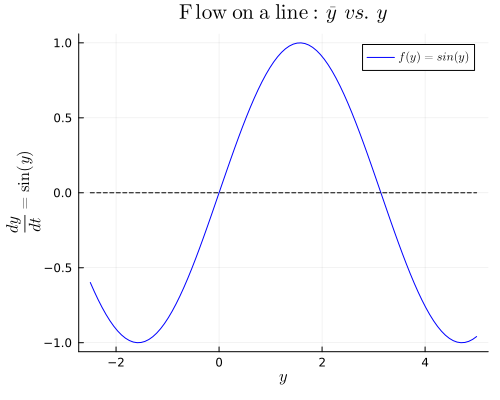

In [2]:
using Plots, LaTeXStrings

𝑦 = range(-2.5, 5.0, 100)
flow_plot = plot(size=(500,400), xlabel=L"y", ylabel=L"\frac{dy}{dt}=\mathrm{sin(}y\mathrm{)}",
                 title=L"$\mathrm{Flow\,\,on\,\,a\,\,line:}\bar{y}\,\,\,vs.\,y$")
plot!(flow_plot, 𝑦, f_sin.(𝑦), c=:blue, label=L"f(y)=sin(y)")
plot!(flow_plot, [𝑦[1], 𝑦[end]], [0, 0], ls=:dash, c=:black, label=false)

### 2.2 Second task
- In the space below, type out the equation for the linearized form of our ODE when it is linearized about the lowest, positive-valued, stable steadystate.

- Original form: $\frac{dy}{dt} = f(y) = sin(y)$
- Linearization: $\frac{dy}{dt} = f(\bar{y}) + \frac{\partial f}{\partial y}|_{\bar{y}}\cdot(y-\bar{y})$
- Linearized form: $\frac{dy}{dt} = sin(\bar{y}) + cos(\bar{y})\cdot(y-\bar{y})$

The lowest, positive-valued, stable steadystate: π = 3.1416..

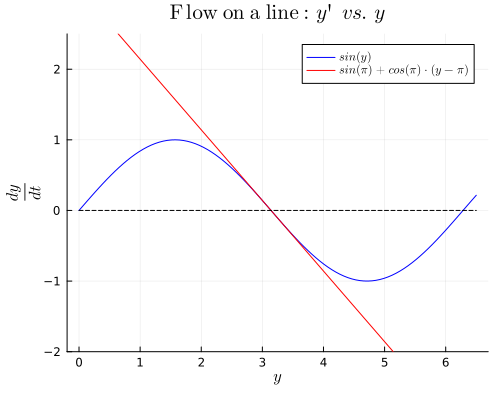

In [3]:
using NLsolve

f = (F, y) -> F[1] = sin(y[1])
j = (J, y) -> J[1] = cos(y[1])
Lf = (y, y_) -> sin(y_) + cos(y_)*(y - y_)

results = nlsolve(f, j, [2.0]);
raiz = round(results.zero[1], digits=4)
printstyled("The lowest, positive-valued, stable steadystate: π = $(raiz)..";  color=:blue)

𝑦 = range(0.0, 6.5, 100)
flow_plot = plot(size=(500,400), xlabel=L"y", ylabel=L"\frac{dy}{dt}",
                 title=L"$\mathrm{Flow\,\,on\,\,a\,\,line:}y'\,\,\,vs.\,y$")
plot!(flow_plot, 𝑦, f_sin.(𝑦), c=:blue, label=L"sin(y)")
plot!(flow_plot, 𝑦, Lf.(𝑦, raiz), c=:red, ylims=(-2, 2.5),
       label=L"sin(\pi)+cos(\pi)\cdot(y-\pi)")
plot!(flow_plot, [𝑦[1], 𝑦[end]], [0, 0], ls=:dash, c=:black, label=false)

### 2.3 Third task
- We want to compare the responses of our linearized model to our original nonlinear model. On a single figure, plot the time response of both models when starting at an initial conditions of $y_0 = 3$. Clearly indicate which lines represent which ODEs.

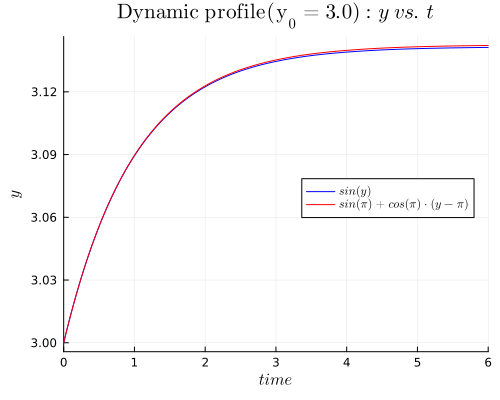

In [4]:
using DifferentialEquations

f = (dy, y, r, t) -> dy[1] = sin(y[1])
Lf = (dy, y, y_, t) -> dy[1] = sin(y_) + cos(y_)*(y[1] - y_)

y0 = [3.0]
tspan = (0.0, 6.0)
f_prob = ODEProblem(f, y0, tspan);
Lf_prob = ODEProblem(Lf, y0, tspan, 3.0);
fsol = solve(f_prob, Tsit5(); verbose=false);
Lfsol = solve(Lf_prob, Tsit5(); verbose=false);

dynamic_profile = plot(title=L"$\mathrm{Dynamic\,\,profile\,(y_{0}=3.0):}y\,\,vs.\,t$")
plot!(dynamic_profile, fsol, c=:blue, label=L"sin(y)")
plot!(dynamic_profile, Lfsol, c=:red, label=L"sin(\pi)+cos(\pi)\cdot(y-\pi)", leg=:right)
plot!(size=(500,400), xlabel=L"time", ylabel=L"y")

### 2.4 Fourth task
- Let's test one more initial condition. On a single figure, plot the time response of both models when starting at an initial conditions of $y_0 = 1$. Clearly indicate which lines represent which ODEs.

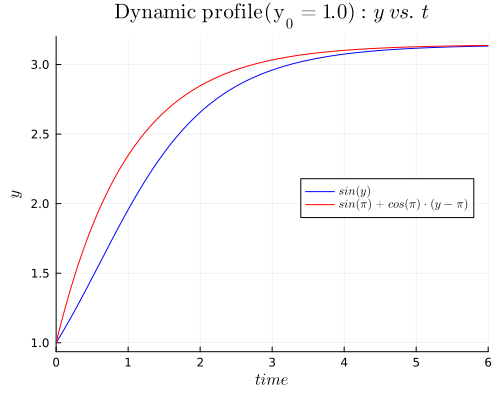

In [5]:
x0 = [1.0]
fsol = solve(remake(f_prob; u0=x0), Tsit5(); verbose=false)
Lfsol = solve(remake(Lf_prob; u0=x0), Tsit5(); verbose=false)

dynamic_profile = plot(title=L"$\mathrm{Dynamic\,\,profile\,(y_{0}=1.0):}y\,\,vs.\,t$")
plot!(dynamic_profile, fsol, c=:blue, label=L"sin(y)")
plot!(dynamic_profile, Lfsol, c=:red, label=L"sin(\pi)+cos(\pi)\cdot(y-\pi)", leg=:right)
plot!(size=(500,400), xlabel=L"time", ylabel=L"y")

Discuss the results from parts 3 and 4. Are the time trajectories of the linearized and nonlinear models similar? When should they be and when should they not be similar?
<div class="alert alert-block alert-info">
<b>Comments: Linearizing the function allows us to generate an approximation. However, the error associated with this approximation will depend on the value around which the linearization is performed. In the case of an ODE, the response produced from an initial condition will determine whether (or not) that reference value produces a good approximation.</b>
</div>

***